In [1]:
import pandas as pd

In [2]:
df_1 = pd.read_csv('./data/2014_2018.csv')

# 2014 ~ 2018 년도 폐기물 총계
df_14_18 = df_1[df_1['구분_시도']=='전국'][['총계_계', 'YEAR']]

In [3]:
df_2 = pd.read_csv('./data/2019_2021.csv')

# 컬럼명 동일시
df_2.rename(columns = {'2019년 발생량':'총계_계'},inplace=True)

# 2019 ~ 2021 년도 폐기물 총계
df_19_21 = df_2[(df_2['시도']=='전국')&(df_2['폐기물 종류_대']=='합계')][['총계_계','YEAR']]

In [4]:
# union
df = pd.concat([df_14_18, df_19_21]).reset_index(drop=True)

In [5]:
df_bak = df.copy()

In [6]:

df

,총계_계,YEAR
0,42355.2,2014
1,43411.2,2015
2,45460.3,2016
3,45008.9,2017
4,46749.3,2018
5,45912.1,2019
6,47403.8,2020
7,45894.6,2021


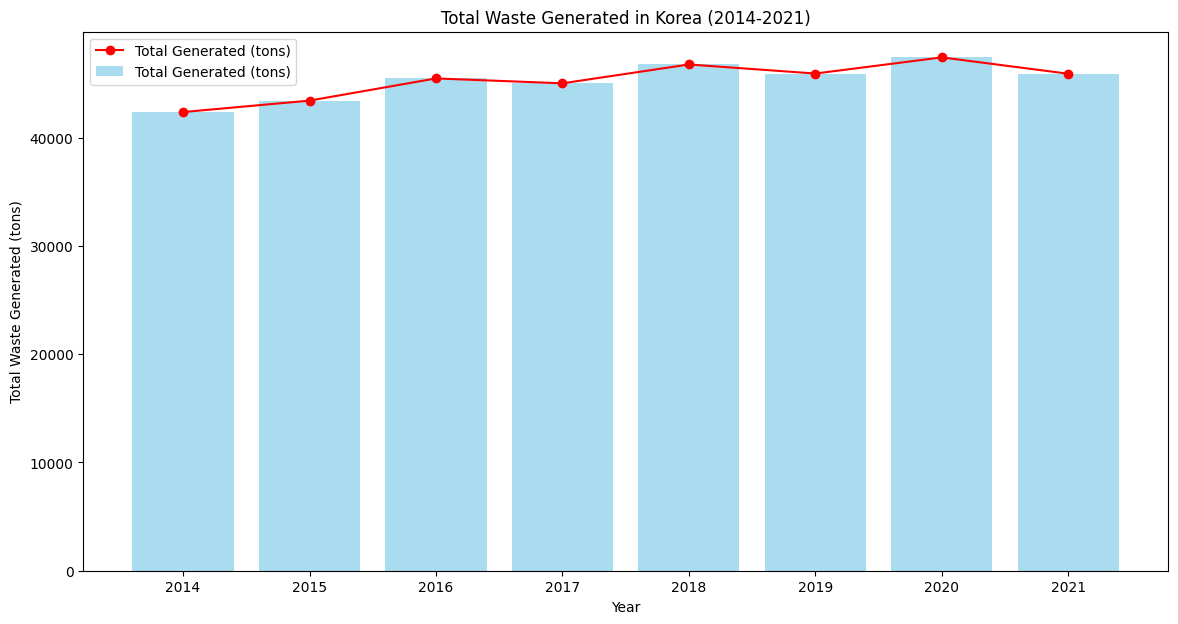

In [7]:
import matplotlib.pyplot as plt
# 그래프 크기 설정
plt.figure(figsize=(14, 7))

# plt.grid(True)

# 막대그래프
plt.bar(df['YEAR'], df['총계_계'], color='skyblue', label='Total Generated (tons)', alpha=0.7)

# 꺾은선그래프
plt.plot(df['YEAR'], df['총계_계'], color='r', marker='o', label='Total Generated (tons)')

# 제목과 레이블 추가
plt.title('Total Waste Generated in Korea (2014-2021)')
plt.xlabel('Year')
plt.ylabel('Total Waste Generated (tons)')
plt.legend()

# 그래프 표시

plt.show()

# ARIMA 모델 시각화

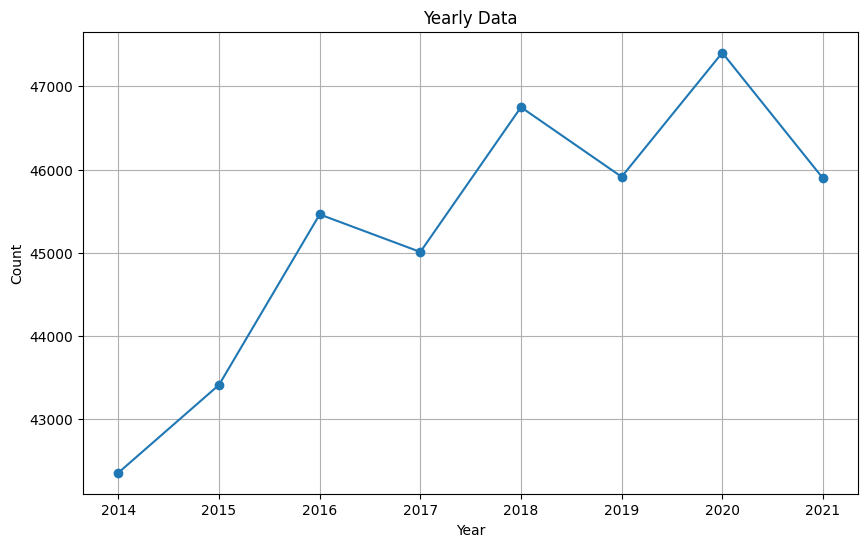

                               SARIMAX Results                                
Dep. Variable:                   총계_계   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -58.280
Date:                Sat, 15 Jun 2024   AIC                            122.560
Time:                        12:23:10   BIC                            122.397
Sample:                             0   HQIC                           120.554
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.022    -44.953      0.000      -1.044      -0.956
ma.L1          0.9987      0.815      1.225      0.221      -0.599       2.597
sigma2      9.768e+05   8.34e-07   1.17e+12      0.0

/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836:

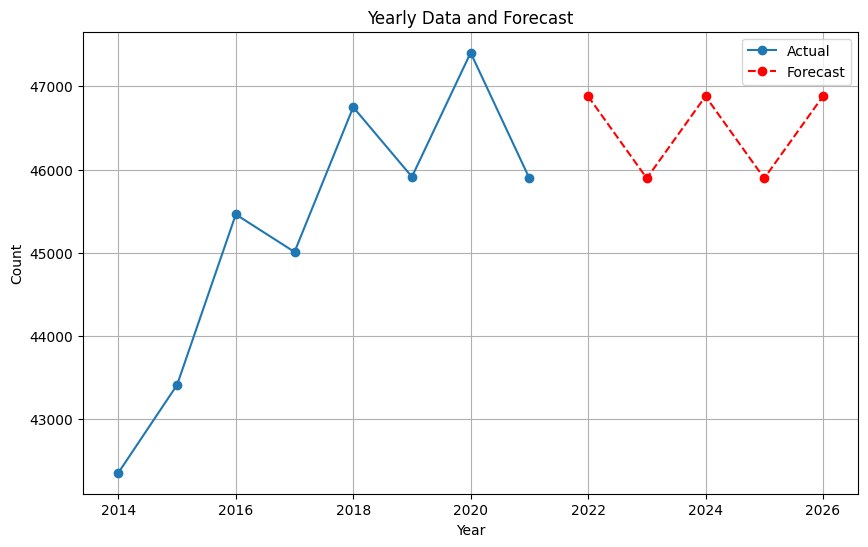

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df.set_index('YEAR', inplace=True)

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['총계_계'], marker='o')
plt.title('Yearly Data')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# ARIMA 모델 피팅
model = ARIMA(df['총계_계'], order=(1, 1, 1))
model_fit = model.fit()

# 요약 출력
print(model_fit.summary())

# 예측
forecast = model_fit.forecast(steps=5)  # 향후 5년 예측
forecast_years = [2022, 2023, 2024, 2025, 2026]
forecast_df = pd.DataFrame({'YEAR': forecast_years, 'Forecast': forecast})
forecast_df.set_index('YEAR', inplace=True)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['총계_계'], marker='o', label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], marker='o', linestyle='--', color='red', label='Forecast')
plt.title('Yearly Data and Forecast')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


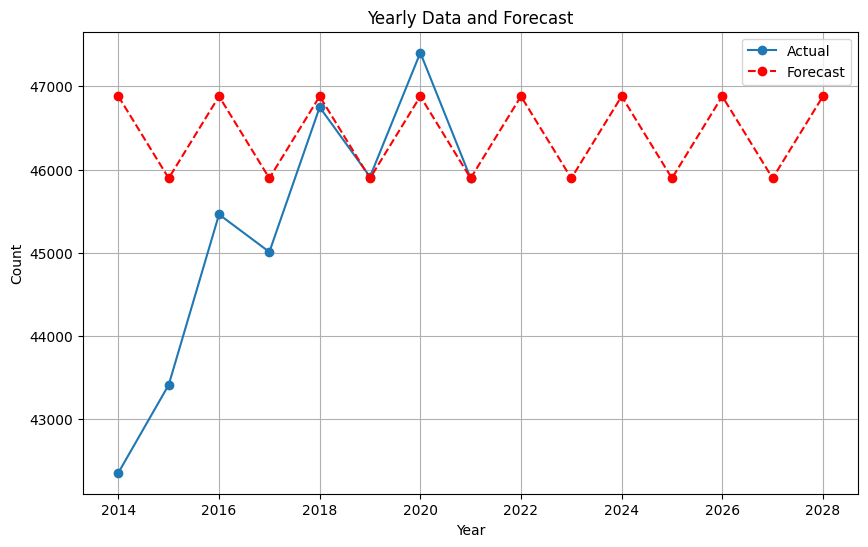

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# 예측
forecast = model_fit.forecast(steps=15)  # 향후 15년 예측
forecast_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028]
forecast_df = pd.DataFrame({'YEAR': forecast_years, 'Forecast': forecast})
forecast_df.set_index('YEAR', inplace=True)

# 기존 데이터와 예측 데이터를 하나의 DataFrame으로 결합
combined_df = pd.concat([df, forecast_df.rename(columns={'Forecast': '총계_계'})])

# 예측 결과 시각화
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['총계_계'], marker='o', label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], marker='o', linestyle='--', color='red', label='Forecast')
plt.title('Yearly Data and Forecast')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# OLE 모델 시각화

/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                   총계_계   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     13.67
Date:                Sat, 15 Jun 2024   Prob (F-statistic):             0.0101
Time:                        12:23:10   Log-Likelihood:                -65.449
No. Observations:                   8   AIC:                             134.9
Df Residuals:                       6   BIC:                             135.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.104e+06   3.11e+05     -3.551      0.0

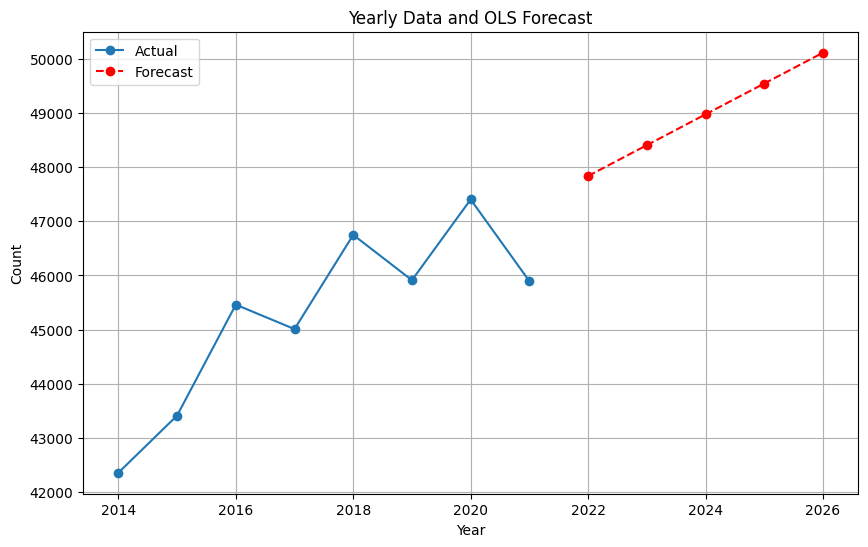

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = df_bak['YEAR']
y = df_bak['총계_계']

# 독립 변수에 상수 항 추가
X = sm.add_constant(X)

# OLS 모델 피팅
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

# 예측
forecast_years = [2022, 2023, 2024, 2025, 2026]
forecast_years_with_const = sm.add_constant(forecast_years)
forecast = model.predict(forecast_years_with_const)
forecast_df = pd.DataFrame({'YEAR': forecast_years, 'Forecast': forecast})
forecast_df.set_index('YEAR', inplace=True)

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_bak['YEAR'], df_bak['총계_계'], marker='o', label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], marker='o', linestyle='--', color='red', label='Forecast')
plt.title('Yearly Data and OLS Forecast')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


# 앙상블모델

/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/samuel/Dev/BDAV1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836:

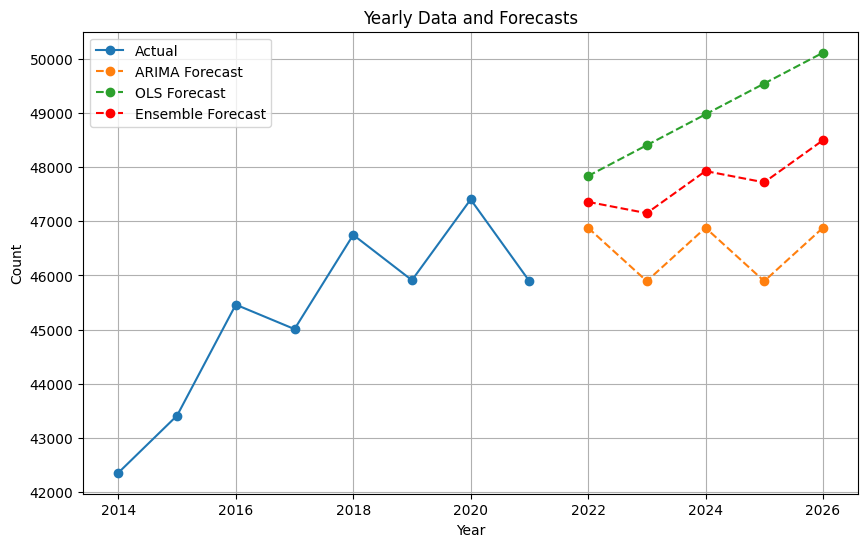

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# df = df_bak

# df.set_index('YEAR', inplace=True)

# ARIMA 모델 피팅
arima_model = ARIMA(df['총계_계'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=5)
arima_forecast_years = [2022, 2023, 2024, 2025, 2026]
arima_forecast_df = pd.DataFrame({'YEAR': arima_forecast_years, 'ARIMA_Forecast': arima_forecast})
arima_forecast_df.set_index('YEAR', inplace=True)

# OLS 모델 피팅
X = df.index
y = df['총계_계']
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
forecast_years = [2022, 2023, 2024, 2025, 2026]
forecast_years_with_const = sm.add_constant(forecast_years)
ols_forecast = ols_model.predict(forecast_years_with_const)
ols_forecast_df = pd.DataFrame({'YEAR': forecast_years, 'OLS_Forecast': ols_forecast})
ols_forecast_df.set_index('YEAR', inplace=True)

# 앙상블 예측
ensemble_forecast_df = pd.DataFrame({
    'YEAR': forecast_years,
    'Ensemble_Forecast': (arima_forecast + ols_forecast) / 2
})
ensemble_forecast_df.set_index('YEAR', inplace=True)

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['총계_계'], marker='o', label='Actual')
plt.plot(arima_forecast_df.index, arima_forecast_df['ARIMA_Forecast'], marker='o', linestyle='--', label='ARIMA Forecast')
plt.plot(ols_forecast_df.index, ols_forecast_df['OLS_Forecast'], marker='o', linestyle='--', label='OLS Forecast')
plt.plot(ensemble_forecast_df.index, ensemble_forecast_df['Ensemble_Forecast'], marker='o', linestyle='--', color='red', label='Ensemble Forecast')
plt.title('Yearly Data and Forecasts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
